### **DATA COLLECTION AND PREPARATION**



*   Importing the Libraries and Loading the Dataset



In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('content/anemia.csv')  # Upload the file to Colab first or use from Google Drive

# Display first few rows
print(df.head())

   Gender  Hemoglobin   MCH  MCHC   MCV  Result
0       1        14.9  22.7  29.1  83.7       0
1       0        15.9  25.4  28.3  72.0       0
2       0         9.0  21.5  29.6  71.2       1
3       0        14.9  16.0  31.4  87.5       0
4       1        14.7  22.0  28.2  99.5       0




*   Data Cleaning



In [48]:
# Basic information about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None


In [49]:
# Statistical summary
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
            Gender   Hemoglobin          MCH         MCHC          MCV  \
count  1421.000000  1421.000000  1421.000000  1421.000000  1421.000000   
mean      0.520760    13.412738    22.905630    30.251232    85.523786   
std       0.499745     1.974546     3.969375     1.400898     9.636701   
min       0.000000     6.600000    16.000000    27.800000    69.400000   
25%       0.000000    11.700000    19.400000    29.000000    77.300000   
50%       1.000000    13.200000    22.700000    30.400000    85.300000   
75%       1.000000    15.000000    26.200000    31.400000    94.200000   
max       1.000000    16.900000    30.000000    32.500000   101.600000   

            Result  
count  1421.000000  
mean      0.436312  
std       0.496102  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


In [50]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64




*   Handling Imbalanced Data




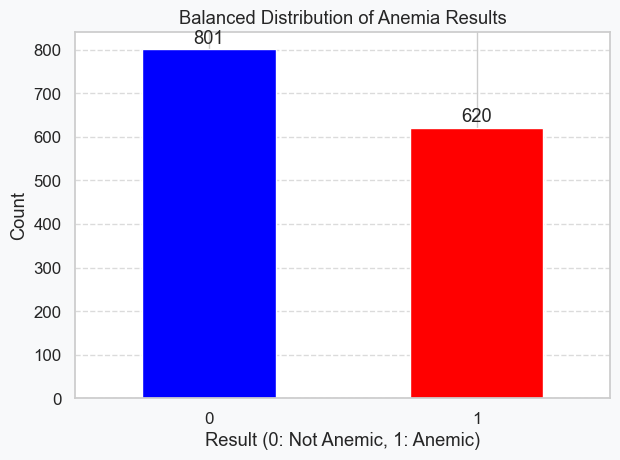

In [51]:
# Checking for the count of anemia and not anemia
import matplotlib.pyplot as plt

results = df['Result'].value_counts()
results.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Result (0: Not Anemic, 1: Anemic)')
plt.ylabel('Count')
plt.title('Balanced Distribution of Anemia Results')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(results):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [52]:
# Undersampling the majority class to balance the dataset
from sklearn.utils import resample
import pandas as pd

# Separate majority and minority classes
majority_class = df[df['Result'] == 0]
minority_class = df[df['Result'] == 1]

# Undersample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with minority class
df_balanced = pd.concat([majority_downsampled, minority_class])

# Check the new class distribution
print(df_balanced['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


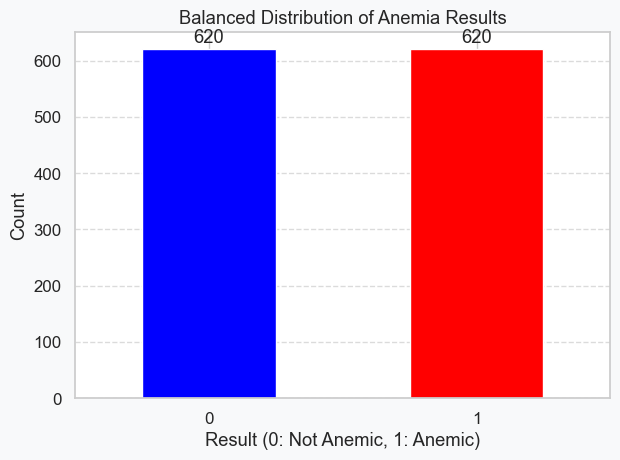

In [53]:
# Plot the balanced result counts after undersampling
import matplotlib.pyplot as plt

# Get value counts from the BALANCED dataframe (df_balanced, not df)
result_balanced = df_balanced['Result'].value_counts()

# Create the bar plot with customized colors
result_balanced.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Result (0: Not Anemic, 1: Anemic)')
plt.ylabel('Count')
plt.title('Balanced Distribution of Anemia Results')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, count in enumerate(result_balanced):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **EXPLORATORY DATA ANALYSIS**



*   **Descriptive statistical**



In [54]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000




*   **Univariate Analysis**



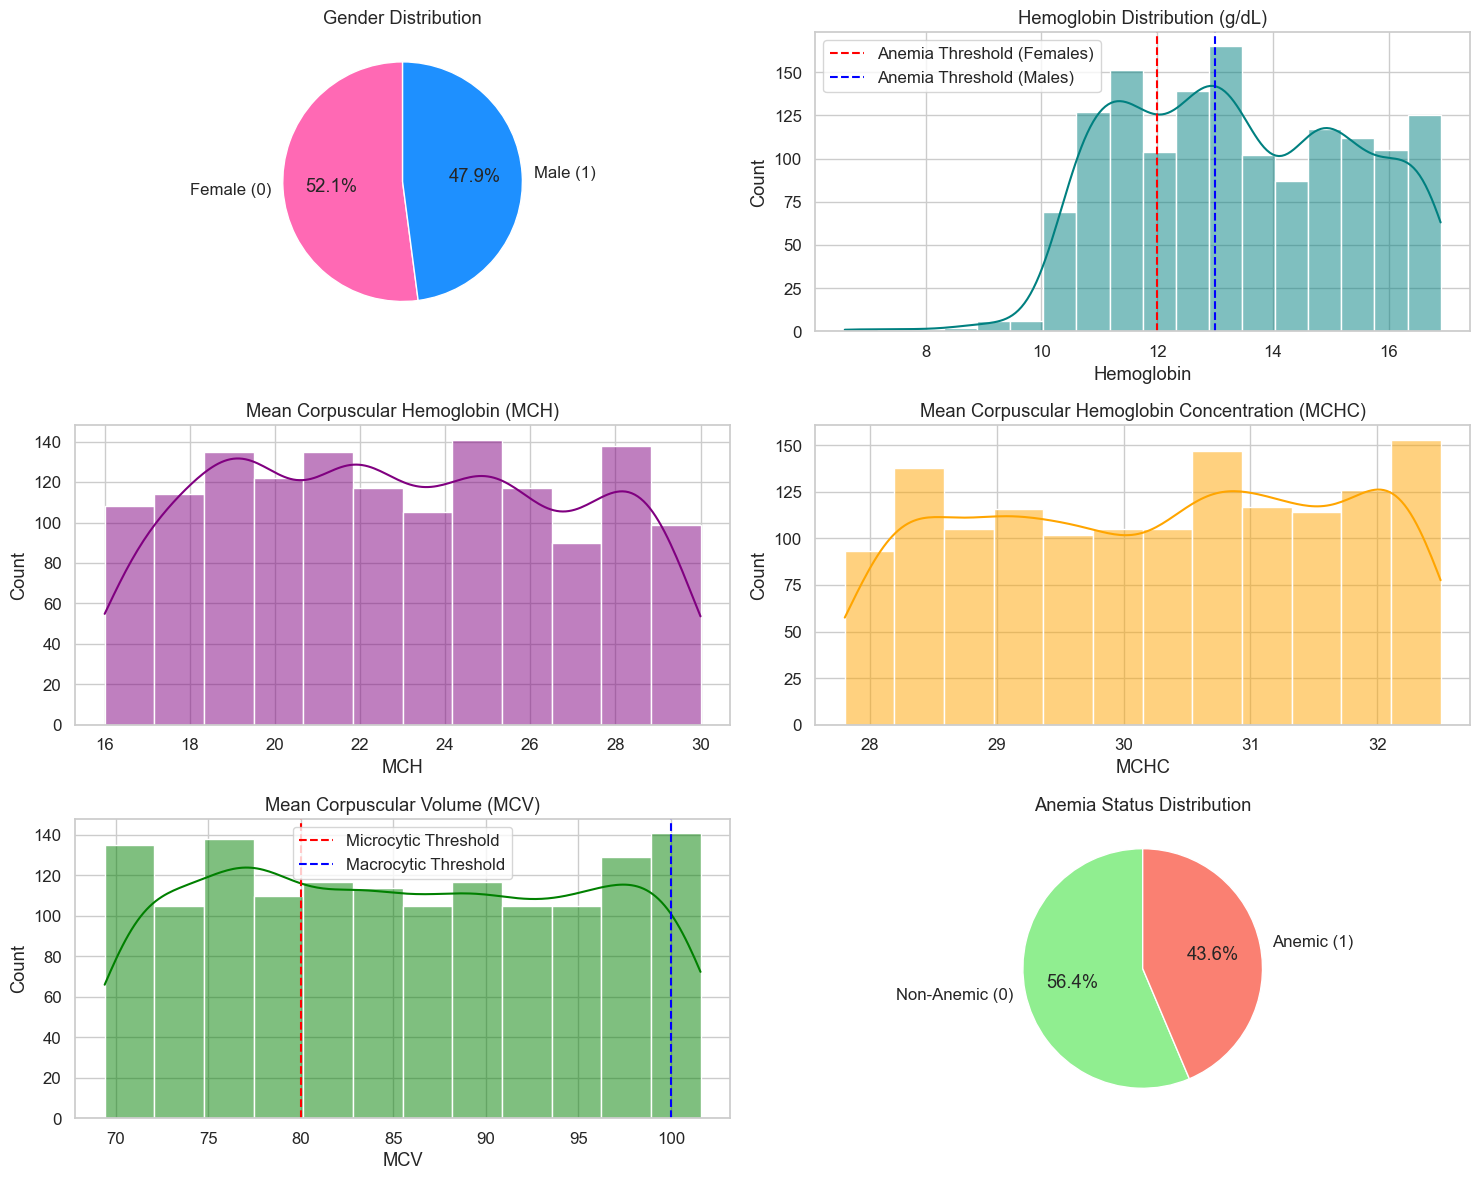

In [55]:
# Set style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

## 1. Gender Distribution (Categorical)
plt.subplot(3, 2, 1)
gender_counts = df['Gender'].value_counts()
gender_labels = ['Female (0)', 'Male (1)']
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%',
        colors=['hotpink', 'dodgerblue'], startangle=90)
plt.title('Gender Distribution')

## 2. Hemoglobin Distribution
plt.subplot(3, 2, 2)
sns.histplot(df['Hemoglobin'], kde=True, color='teal')
plt.axvline(x=12, color='red', linestyle='--', label='Anemia Threshold (Females)')
plt.axvline(x=13, color='blue', linestyle='--', label='Anemia Threshold (Males)')
plt.title('Hemoglobin Distribution (g/dL)')
plt.legend()

## 3. MCH Distribution
plt.subplot(3, 2, 3)
sns.histplot(df['MCH'], kde=True, color='purple')
plt.title('Mean Corpuscular Hemoglobin (MCH)')

## 4. MCHC Distribution
plt.subplot(3, 2, 4)
sns.histplot(df['MCHC'], kde=True, color='orange')
plt.title('Mean Corpuscular Hemoglobin Concentration (MCHC)')

## 5. MCV Distribution
plt.subplot(3, 2, 5)
sns.histplot(df['MCV'], kde=True, color='green')
plt.axvline(x=80, color='red', linestyle='--', label='Microcytic Threshold')
plt.axvline(x=100, color='blue', linestyle='--', label='Macrocytic Threshold')
plt.title('Mean Corpuscular Volume (MCV)')
plt.legend()

## 6. Anemia Status Distribution
plt.subplot(3, 2, 6)
result_counts = df['Result'].value_counts()
result_labels = ['Non-Anemic (0)', 'Anemic (1)']
plt.pie(result_counts, labels=result_labels, autopct='%1.1f%%',
        colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Anemia Status Distribution')

plt.tight_layout()
plt.show()



*   **Bivariate analysis**



C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_box = sns.boxplot(x='Gender_label', y='Hemoglobin', data=df,
C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_bar = sns.barplot(x='Gender_label', y='Hemoglobin', data=mean_hb_gender,
C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  result_box = sns.boxplot(x='Result_label', y='Hemoglobin', data=df

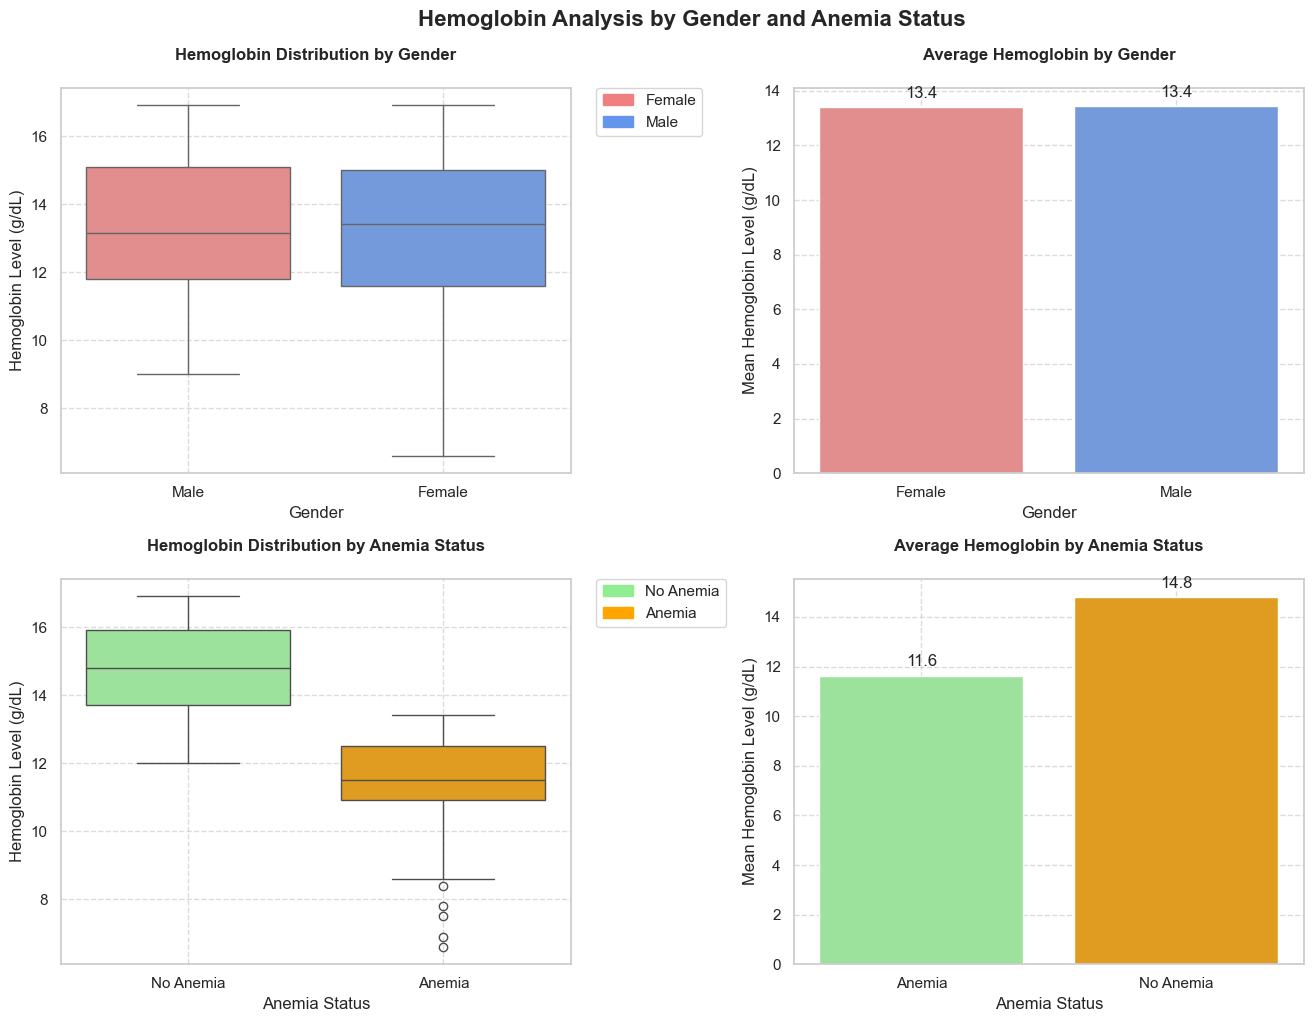

C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_box = sns.boxplot(x='Gender_label', y='MCH', data=df,
C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_bar = sns.barplot(x='Gender_label', y='MCH', data=mean_mch_gender,
C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  result_box = sns.boxplot(x='Result_label', y='MCH', data=df,
C:\Users\Siddhan

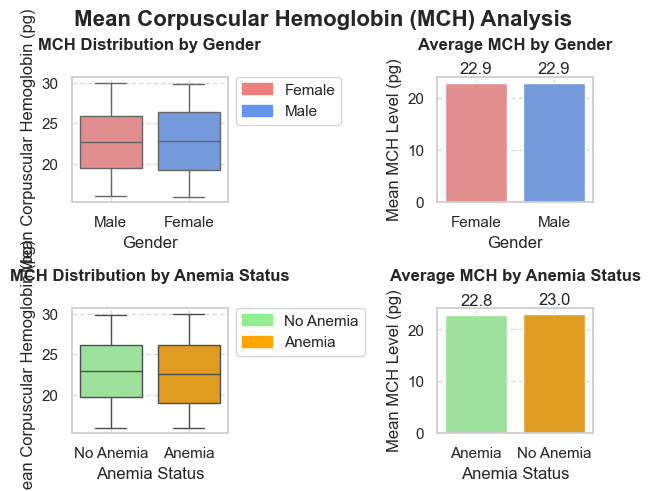

C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_box = sns.boxplot(x='Gender_label', y='MCHC', data=df,
C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_bar = sns.barplot(x='Gender_label', y='MCHC', data=mean_mchc_gender,
C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  result_box = sns.boxplot(x='Result_label', y='MCHC', data=df,
C:\Users\Si

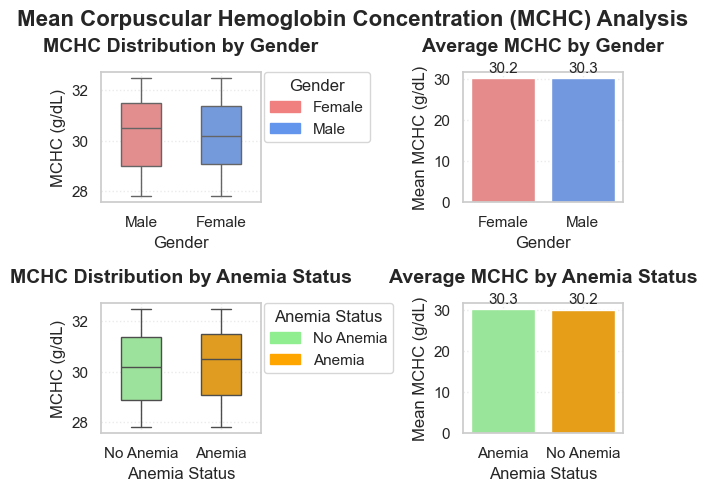

C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:247: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0], x='Gender_label', y='MCV', data=df,
C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:263: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(ax=axes[0,1], x='Gender_label', y='MCV', data=mean_mcv_gender,
C:\Users\Siddhant Gupta\AppData\Local\Temp\ipykernel_14208\3409547447.py:278: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1,0], x='Result_label', y='MCV', data=df,
C:\Us

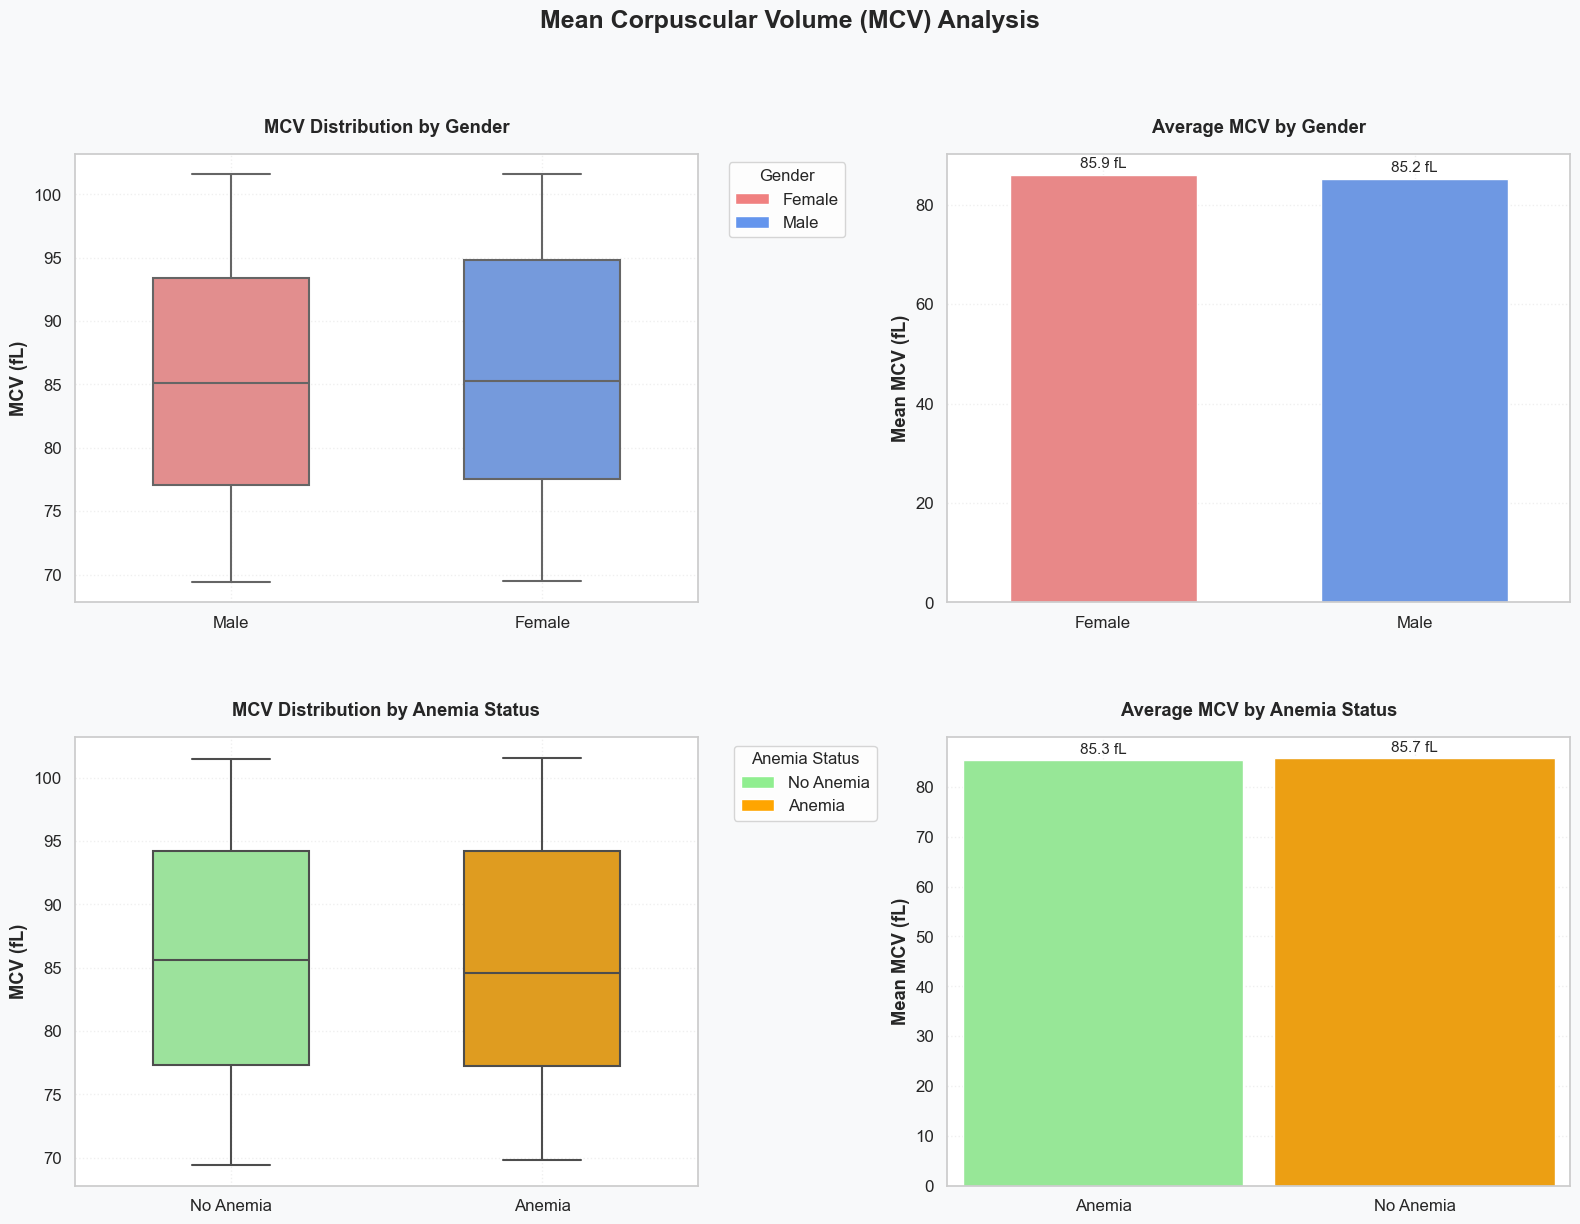

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('content/anemia.csv')

# Set style for better visualization
sns.set(style="whitegrid", palette="pastel")

# Create a figure with subplots
plt.figure(figsize=(14, 10))

# Custom color palettes
gender_palette = {"Female": "lightcoral", "Male": "cornflowerblue"}
result_palette = {"No Anemia": "lightgreen", "Anemia": "orange"}

# Map numeric values to meaningful labels for plotting
df['Gender_label'] = df['Gender'].map({0: 'Female', 1: 'Male'})
df['Result_label'] = df['Result'].map({0: 'No Anemia', 1: 'Anemia'})

# Box plot for hemoglobin by gender
plt.subplot(2, 2, 1)
gender_box = sns.boxplot(x='Gender_label', y='Hemoglobin', data=df,
                         palette=gender_palette.values())
plt.title('Hemoglobin Distribution by Gender', fontweight='bold', pad=20)
plt.xlabel('Gender')
plt.ylabel('Hemoglobin Level (g/dL)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend for gender colors
gender_legend = [plt.Rectangle((0,0),1,1, color=gender_palette['Female']),
                 plt.Rectangle((0,0),1,1, color=gender_palette['Male'])]
plt.legend(gender_legend, ['Female', 'Male'], bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0.)

# Bar plot for mean hemoglobin by gender
plt.subplot(2, 2, 2)
mean_hb_gender = df.groupby('Gender_label')['Hemoglobin'].mean().reset_index()
gender_bar = sns.barplot(x='Gender_label', y='Hemoglobin', data=mean_hb_gender,
                         palette=gender_palette.values())
plt.title('Average Hemoglobin by Gender', fontweight='bold', pad=20)
plt.xlabel('Gender')
plt.ylabel('Mean Hemoglobin Level (g/dL)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of bars
for p in gender_bar.patches:
    gender_bar.annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10),
                       textcoords='offset points')

# Box plot for hemoglobin by anemia result
plt.subplot(2, 2, 3)
result_box = sns.boxplot(x='Result_label', y='Hemoglobin', data=df,
                         palette=result_palette.values())
plt.title('Hemoglobin Distribution by Anemia Status', fontweight='bold', pad=20)
plt.xlabel('Anemia Status')
plt.ylabel('Hemoglobin Level (g/dL)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend for result colors
result_legend = [plt.Rectangle((0,0),1,1, color=result_palette['No Anemia']),
                 plt.Rectangle((0,0),1,1, color=result_palette['Anemia'])]
plt.legend(result_legend, ['No Anemia', 'Anemia'], bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0.)

# Bar plot for mean hemoglobin by anemia result
plt.subplot(2, 2, 4)
mean_hb_result = df.groupby('Result_label')['Hemoglobin'].mean().reset_index()
result_bar = sns.barplot(x='Result_label', y='Hemoglobin', data=mean_hb_result,
                         palette=result_palette.values())
plt.title('Average Hemoglobin by Anemia Status', fontweight='bold', pad=20)
plt.xlabel('Anemia Status')
plt.ylabel('Mean Hemoglobin Level (g/dL)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of bars
for p in result_bar.patches:
    result_bar.annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10),
                       textcoords='offset points')

# Adjust layout with more padding for legends
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.suptitle('Hemoglobin Analysis by Gender and Anemia Status',
             y=1.02, fontsize=16, fontweight='bold')
plt.show()

print()

# 1. Box plot for MCH by gender
plt.subplot(2, 2, 1)
gender_box = sns.boxplot(x='Gender_label', y='MCH', data=df,
                        palette=gender_palette.values())
plt.title('MCH Distribution by Gender', fontweight='bold', pad=20)
plt.xlabel('Gender')
plt.ylabel('Mean Corpuscular Hemoglobin (pg)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend for gender
gender_legend = [plt.Rectangle((0,0),1,1, color=gender_palette['Female']),
                plt.Rectangle((0,0),1,1, color=gender_palette['Male'])]
plt.legend(gender_legend, ['Female', 'Male'], bbox_to_anchor=(1.05, 1),
          loc='upper left', borderaxespad=0.)

# 2. Bar plot for mean MCH by gender
plt.subplot(2, 2, 2)
mean_mch_gender = df.groupby('Gender_label')['MCH'].mean().reset_index()
gender_bar = sns.barplot(x='Gender_label', y='MCH', data=mean_mch_gender,
                        palette=gender_palette.values())
plt.title('Average MCH by Gender', fontweight='bold', pad=20)
plt.xlabel('Gender')
plt.ylabel('Mean MCH Level (pg)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on bars
for p in gender_bar.patches:
    gender_bar.annotate(f'{p.get_height():.1f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10),
                      textcoords='offset points')

# 3. Box plot for MCH by anemia result
plt.subplot(2, 2, 3)
result_box = sns.boxplot(x='Result_label', y='MCH', data=df,
                        palette=result_palette.values())
plt.title('MCH Distribution by Anemia Status', fontweight='bold', pad=20)
plt.xlabel('Anemia Status')
plt.ylabel('Mean Corpuscular Hemoglobin (pg)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend for result
result_legend = [plt.Rectangle((0,0),1,1, color=result_palette['No Anemia']),
                plt.Rectangle((0,0),1,1, color=result_palette['Anemia'])]
plt.legend(result_legend, ['No Anemia', 'Anemia'], bbox_to_anchor=(1.05, 1),
          loc='upper left', borderaxespad=0.)

# 4. Bar plot for mean MCH by anemia result
plt.subplot(2, 2, 4)
mean_mch_result = df.groupby('Result_label')['MCH'].mean().reset_index()
result_bar = sns.barplot(x='Result_label', y='MCH', data=mean_mch_result,
                        palette=result_palette.values())
plt.title('Average MCH by Anemia Status', fontweight='bold', pad=20)
plt.xlabel('Anemia Status')
plt.ylabel('Mean MCH Level (pg)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels on bars
for p in result_bar.patches:
    result_bar.annotate(f'{p.get_height():.1f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10),
                      textcoords='offset points')

# Adjust layout and add main title
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.suptitle('Mean Corpuscular Hemoglobin (MCH) Analysis',
            y=1.02, fontsize=16, fontweight='bold')
plt.show()

print()

# 1. Box plot for MCHC by gender
plt.subplot(2, 2, 1)
gender_box = sns.boxplot(x='Gender_label', y='MCHC', data=df,
                        palette=gender_palette.values(), width=0.5)
plt.title('MCHC Distribution by Gender', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('MCHC (g/dL)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# Add legend for gender
gender_legend = [plt.Rectangle((0,0),1,1, color=gender_palette['Female']),
                plt.Rectangle((0,0),1,1, color=gender_palette['Male'])]
plt.legend(gender_legend, ['Female', 'Male'], bbox_to_anchor=(1.02, 1),
          loc='upper left', borderaxespad=0., title='Gender')

# 2. Bar plot for mean MCHC by gender
plt.subplot(2, 2, 2)
mean_mchc_gender = df.groupby('Gender_label')['MCHC'].mean().reset_index()
gender_bar = sns.barplot(x='Gender_label', y='MCHC', data=mean_mchc_gender,
                        palette=gender_palette.values(), saturation=0.8)
plt.title('Average MCHC by Gender', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean MCHC (g/dL)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# Add value labels on bars
for p in gender_bar.patches:
    gender_bar.annotate(f'{p.get_height():.1f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 7),
                      textcoords='offset points', fontsize=11)

# 3. Box plot for MCHC by anemia result
plt.subplot(2, 2, 3)
result_box = sns.boxplot(x='Result_label', y='MCHC', data=df,
                        palette=result_palette.values(), width=0.5)
plt.title('MCHC Distribution by Anemia Status', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Anemia Status', fontsize=12)
plt.ylabel('MCHC (g/dL)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# Add legend for result
result_legend = [plt.Rectangle((0,0),1,1, color=result_palette['No Anemia']),
                plt.Rectangle((0,0),1,1, color=result_palette['Anemia'])]
plt.legend(result_legend, ['No Anemia', 'Anemia'], bbox_to_anchor=(1.02, 1),
          loc='upper left', borderaxespad=0., title='Anemia Status')

# 4. Bar plot for mean MCHC by anemia result
plt.subplot(2, 2, 4)
mean_mchc_result = df.groupby('Result_label')['MCHC'].mean().reset_index()
result_bar = sns.barplot(x='Result_label', y='MCHC', data=mean_mchc_result,
                        palette=result_palette.values(), saturation=0.8)
plt.title('Average MCHC by Anemia Status', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Anemia Status', fontsize=12)
plt.ylabel('Mean MCHC (g/dL)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# Add value labels on bars
for p in result_bar.patches:
    result_bar.annotate(f'{p.get_height():.1f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 7),
                      textcoords='offset points', fontsize=11)

# Adjust layout and add main title
plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.suptitle('Mean Corpuscular Hemoglobin Concentration (MCHC) Analysis',
            y=1.02, fontsize=16, fontweight='bold')
plt.show()

print()

# Set style for better visualization
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.facecolor'] = '#f8f9fa'  # Light gray background

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Mean Corpuscular Volume (MCV) Analysis',
            y=1.02, fontsize=18, fontweight='bold')

# 1. Box plot for MCV by gender
sns.boxplot(ax=axes[0,0], x='Gender_label', y='MCV', data=df,
           palette=gender_palette.values(), width=0.5, linewidth=1.5)
axes[0,0].set_title('MCV Distribution by Gender', fontweight='bold', pad=15)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('MCV (fL)', fontweight='bold')
axes[0,0].grid(True, linestyle=':', alpha=0.3)

# Add custom legend (moved further right)
gender_legend = [plt.Rectangle((0,0),1,1, fc=gender_palette['Female']),
                plt.Rectangle((0,0),1,1, fc=gender_palette['Male'])]
axes[0,0].legend(gender_legend, ['Female', 'Male'],
                loc='upper right', bbox_to_anchor=(1.25, 1),  # Increased from 1.15 to 1.25
                title='Gender', title_fontsize=12)

# 2. Bar plot for mean MCV by gender (adjusted width)
mean_mcv_gender = df.groupby('Gender_label')['MCV'].mean().reset_index()
bar1 = sns.barplot(ax=axes[0,1], x='Gender_label', y='MCV', data=mean_mcv_gender,
           palette=gender_palette.values(), saturation=0.85, width=0.6)  # Added width parameter
axes[0,1].set_title('Average MCV by Gender', fontweight='bold', pad=15)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Mean MCV (fL)', fontweight='bold')
axes[0,1].grid(True, linestyle=':', alpha=0.3)

# Add value labels
for p in axes[0,1].patches:
    axes[0,1].annotate(f'{p.get_height():.1f} fL',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8),
                      textcoords='offset points', fontsize=11)

# 3. Box plot for MCV by anemia result
sns.boxplot(ax=axes[1,0], x='Result_label', y='MCV', data=df,
           palette=result_palette.values(), width=0.5, linewidth=1.5)
axes[1,0].set_title('MCV Distribution by Anemia Status', fontweight='bold', pad=15)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('MCV (fL)', fontweight='bold')
axes[1,0].grid(True, linestyle=':', alpha=0.3)

# Add custom legend (moved further right)
result_legend = [plt.Rectangle((0,0),1,1, fc=result_palette['No Anemia']),
                plt.Rectangle((0,0),1,1, fc=result_palette['Anemia'])]
axes[1,0].legend(result_legend, ['No Anemia', 'Anemia'],
                loc='upper right', bbox_to_anchor=(1.3, 1),  # Increased from 1.15 to 1.25
                title='Anemia Status', title_fontsize=12)

# 4. Bar plot for mean MCV by anemia result (adjusted width)
mean_mcv_result = df.groupby('Result_label')['MCV'].mean().reset_index()
bar2 = sns.barplot(ax=axes[1,1], x='Result_label', y='MCV', data=mean_mcv_result,
           palette=result_palette.values(), saturation=0.85, width=0.9)  # Added width parameter
axes[1,1].set_title('Average MCV by Anemia Status', fontweight='bold', pad=15)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Mean MCV (fL)', fontweight='bold')
axes[1,1].grid(True, linestyle=':', alpha=0.3)

# Add value labels
for p in axes[1,1].patches:
    axes[1,1].annotate(f'{p.get_height():.1f} fL',
                      (p.get_x() + p.get_width()/2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8),
                      textcoords='offset points', fontsize=11)

# Adjust layout with more space between columns
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.4)  # Increased wspace from 0.2 to 0.4
plt.show()



*   Multivariate Analysis



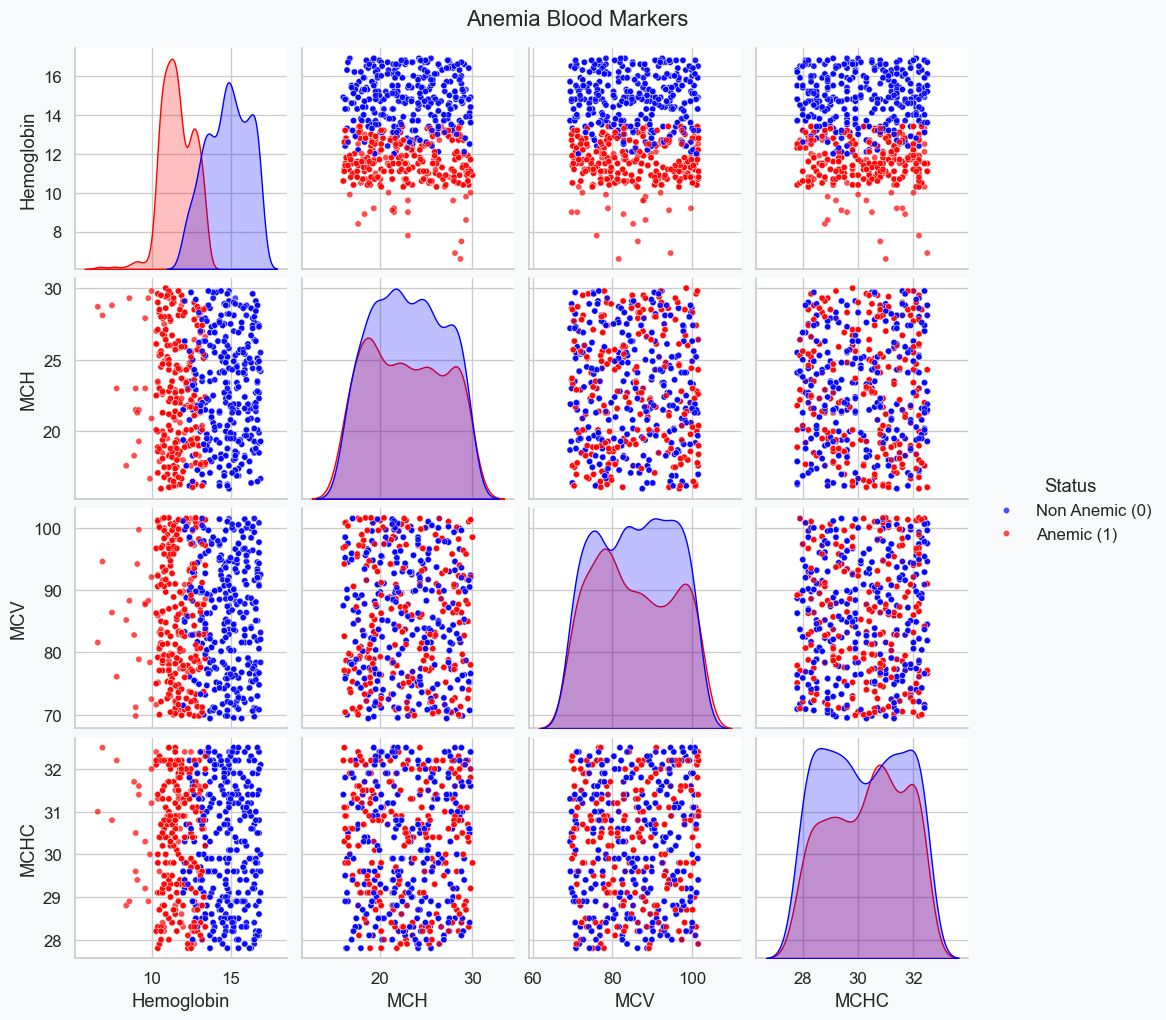

In [57]:
# Load data
df = pd.read_csv('content/anemia.csv')

# Create a copy for visualization
df_viz = df.copy()
df_viz['Status'] = df_viz['Result'].map({0: 'Non Anemic (0)', 1: 'Anemic (1)'})

# PairPlot with custom legend
sns.pairplot(
    df_viz,
    vars=['Hemoglobin', 'MCH', 'MCV', 'MCHC'],
    hue='Status',
    palette={'Non Anemic (0)': 'blue', 'Anemic (1)': 'red'},
    diag_kind='kde',
    plot_kws={'alpha': 0.7, 's': 20}
)
plt.suptitle("Anemia Blood Markers", y=1.02)
plt.show()

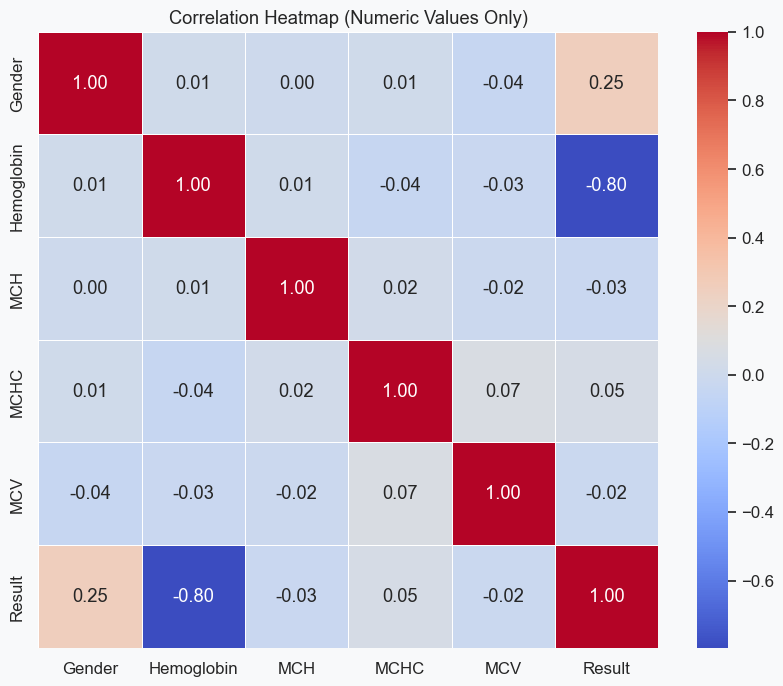

In [58]:
# Heatmap using original numeric 'Result'
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Values Only)")
plt.show()

### **SPLITTING DATA INTO TRAIN AND TEST**

In [59]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_balanced.drop('Result', axis=1)  # Features (all columns except 'Result')
y = df_balanced['Result']               # Target variable

# Split into 70% train and 30% test (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,  # For reproducibility
    stratify=y        # Preserves class distribution in splits
)

# Verify shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set:  {X_test.shape}, {y_test.shape}")

# Check class distribution in splits (should be balanced)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Training set: (868, 5), (868,)
Testing set:  (372, 5), (372,)

Class distribution in training set:
Result
1    0.5
0    0.5
Name: proportion, dtype: float64

Class distribution in testing set:
Result
1    0.5
0    0.5
Name: proportion, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None
            Gender   Hemoglobin          MCH         MCHC          MCV  \
count  1421.000000  1421.000000  1421.000000  1421.000000  1421.000000   
mean      0.520760    13.412738    22.905630    30.251232    85.523786   
std       0.499745     1.974546     3.969375     1.400898     9.636701   
min       0.000000     6.600000    16.000000    27.800000    69.400000   
25%       0.000000    11.700000    19.400000    29.000000    77.300000   
50%       1.000000    13.200000    22.700000    30.400000    85.30

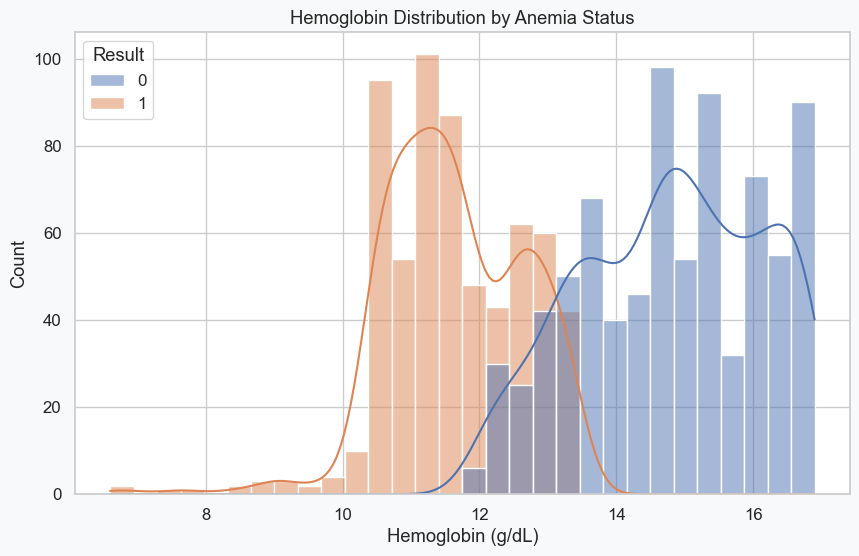

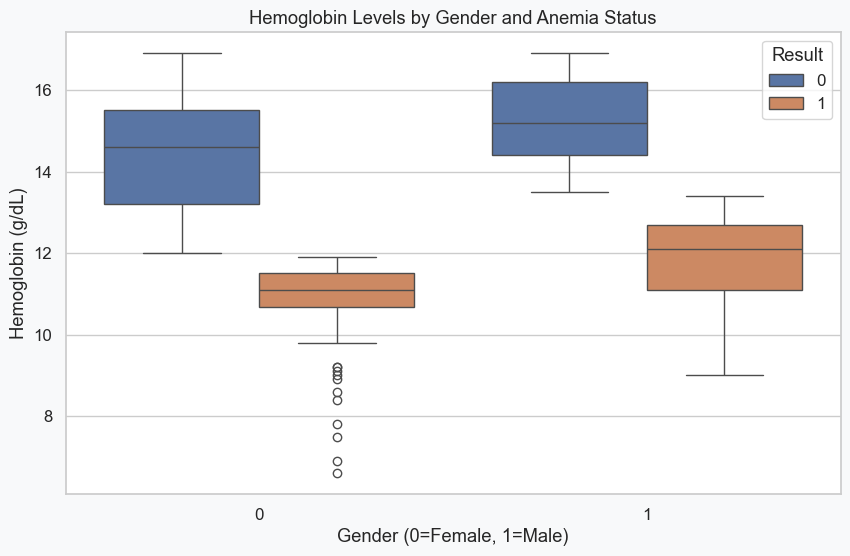

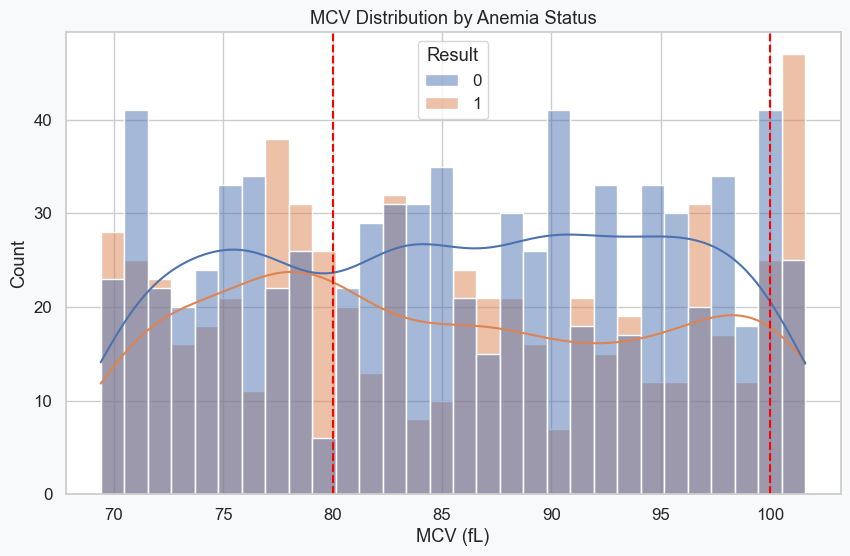

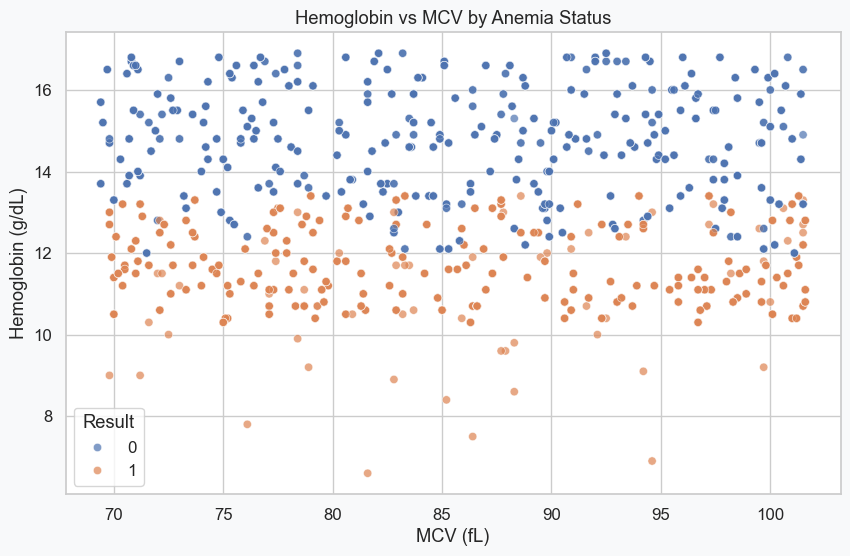

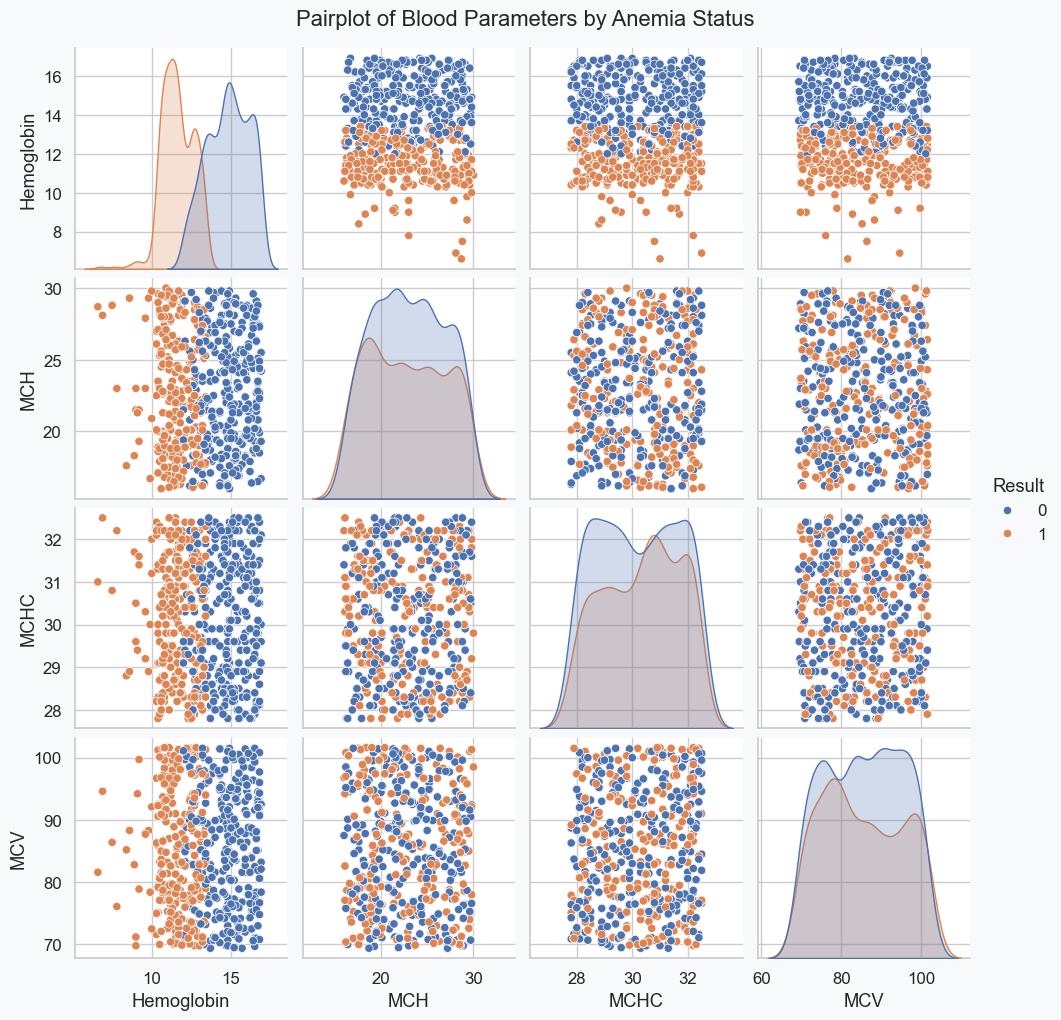

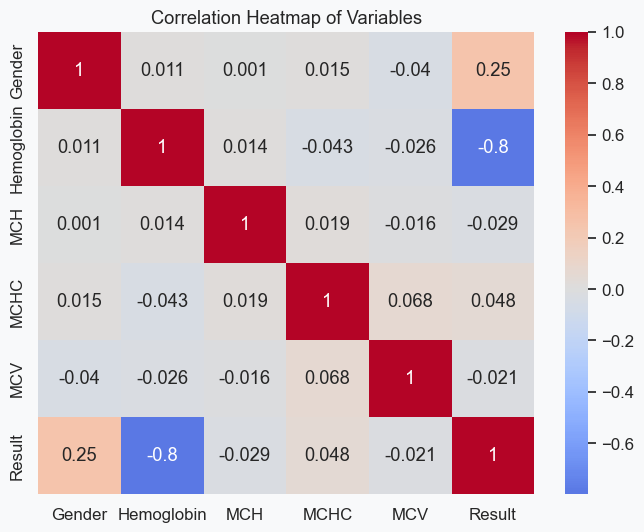

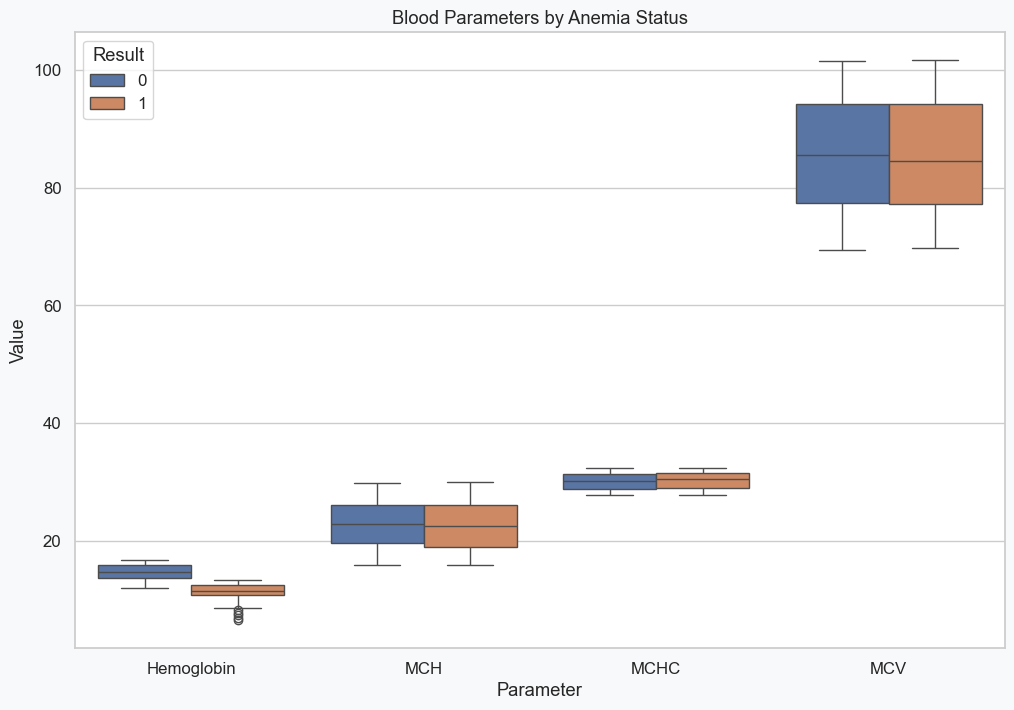

In [60]:
# Load the dataset
df = pd.read_csv('content/anemia.csv')

# 1. Basic information
print(df.info())
print(df.describe())

# 2. Hemoglobin Distribution by Anemia Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hemoglobin', hue='Result', kde=True, bins=30)
plt.title('Hemoglobin Distribution by Anemia Status')
plt.xlabel('Hemoglobin (g/dL)')
plt.ylabel('Count')
plt.show()

# 3. Gender Differences
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Hemoglobin', hue='Result')
plt.title('Hemoglobin Levels by Gender and Anemia Status')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Hemoglobin (g/dL)')
plt.show()

# 4. MCV Patterns
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MCV', hue='Result', kde=True, bins=30)
plt.axvline(80, color='red', linestyle='--')
plt.axvline(100, color='red', linestyle='--')
plt.title('MCV Distribution by Anemia Status')
plt.xlabel('MCV (fL)')
plt.ylabel('Count')
plt.show()

# 5. Scatterplot of Hemoglobin vs MCV
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MCV', y='Hemoglobin', hue='Result', alpha=0.7)
plt.title('Hemoglobin vs MCV by Anemia Status')
plt.xlabel('MCV (fL)')
plt.ylabel('Hemoglobin (g/dL)')
plt.show()

# 6. Pairplot of all parameters
sns.pairplot(data=df, hue='Result', vars=['Hemoglobin', 'MCH', 'MCHC', 'MCV'])
plt.suptitle('Pairplot of Blood Parameters by Anemia Status', y=1.02)
plt.show()

# 7. Correlation heatmap
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Variables')
plt.show()

# 8. Boxplot of all parameters by anemia status
plt.figure(figsize=(12, 8))
df_melted = df.melt(id_vars=['Result'],
                    value_vars=['Hemoglobin', 'MCH', 'MCHC', 'MCV'],
                    var_name='Parameter',
                    value_name='Value')
sns.boxplot(data=df_melted, x='Parameter', y='Value', hue='Result')
plt.title('Blood Parameters by Anemia Status')
plt.show()

# **LOGISTIC REGRESSION**

In [61]:
# 📦 Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🧠 Initialize and train Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# 📈 Predict on test data
y_pred_lr = logistic_regression.predict(X_test)

# 🎯 Evaluate performance
acc_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# 🖨️ Print results
print("===== Logistic Regression Results =====")
print("Accuracy Score:", acc_lr)
print("\nClassification Report:\n", report_lr)
print("Confusion Matrix:\n", cm_lr)


===== Logistic Regression Results =====
Accuracy Score: 0.989247311827957

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       186
           1       0.98      1.00      0.99       186

    accuracy                           0.99       372
   macro avg       0.99      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372

Confusion Matrix:
 [[182   4]
 [  0 186]]


# **RANDOM FOREST CLASSIFIER**

In [62]:
# 📦 Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🧠 Initialize and train Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# 🔮 Predict on test data
y_pred_rf = random_forest.predict(X_test)

# 📊 Evaluate performance
acc_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 🖨️ Print results
print("===== Random Forest Results =====")
print("Accuracy Score:", acc_rf)
print("\nClassification Report:\n", report_rf)
print("Confusion Matrix:\n", cm_rf)


===== Random Forest Results =====
Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       186

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372

Confusion Matrix:
 [[186   0]
 [  0 186]]


## **DECISION TREE**

In [63]:
# 📦 Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🧠 Initialize and train Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# 🔮 Predict on test data
y_pred_dt = decision_tree_model.predict(X_test)

# 📊 Evaluate performance
acc_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# 🖨️ Print results
print("===== Decision Tree Results =====")
print("Accuracy Score:", acc_dt)
print("\nClassification Report:\n", report_dt)
print("Confusion Matrix:\n", cm_dt)


===== Decision Tree Results =====
Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       186

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372

Confusion Matrix:
 [[186   0]
 [  0 186]]


# Gaussian Naive Bayes

In [64]:
# 📦 Import required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🧠 Initialize and train Gaussian Naive Bayes model
NB = GaussianNB()
NB.fit(X_train, y_train)

# 🔮 Predict on test data
y_pred_nb = NB.predict(X_test)

# 📊 Evaluate performance
acc_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# 🖨️ Print results
print("===== Gaussian Naive Bayes Results =====")
print("Accuracy Score:", acc_nb)
print("\nClassification Report:\n", report_nb)
print("Confusion Matrix:\n", cm_nb)


===== Gaussian Naive Bayes Results =====
Accuracy Score: 0.9301075268817204

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       186
           1       0.90      0.96      0.93       186

    accuracy                           0.93       372
   macro avg       0.93      0.93      0.93       372
weighted avg       0.93      0.93      0.93       372

Confusion Matrix:
 [[167  19]
 [  7 179]]


# Support Vector Classifier

In [65]:
# 📦 Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🧠 Initialize and train Support Vector Classifier
support_vector = SVC()
support_vector.fit(X_train, y_train)

# 🔮 Predict on test data
y_pred_svc = support_vector.predict(X_test)

# 📊 Evaluate performance
acc_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)

# 🖨️ Print results
print("===== Support Vector Classifier Results =====")
print("Accuracy Score:", acc_svc)
print("\nClassification Report:\n", report_svc)
print("Confusion Matrix:\n", cm_svc)


===== Support Vector Classifier Results =====
Accuracy Score: 0.8924731182795699

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       186
           1       0.83      0.98      0.90       186

    accuracy                           0.89       372
   macro avg       0.90      0.89      0.89       372
weighted avg       0.90      0.89      0.89       372

Confusion Matrix:
 [[150  36]
 [  4 182]]


# **SUPPORT VECTOR CLASSIFIER**

In [66]:
# 📦 Import required libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🧠 Initialize and train Gradient Boosting model
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

# 🔮 Predict on test data
y_pred_gbc = GBC.predict(X_test)

# 📊 Evaluate performance
acc_gbc = accuracy_score(y_test, y_pred_gbc)
report_gbc = classification_report(y_test, y_pred_gbc)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

# 🖨️ Print results
print("===== Gradient Boosting Classifier Results =====")
print("Accuracy Score:", acc_gbc)
print("\nClassification Report:\n", report_gbc)
print("Confusion Matrix:\n", cm_gbc)


===== Gradient Boosting Classifier Results =====
Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       186

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372

Confusion Matrix:
 [[186   0]
 [  0 186]]


# **Testing the model**

In [67]:
import pandas as pd

# 👇 Sample data with column names
sample_data = pd.DataFrame([[0, 11.6, 22.3, 30.9, 74.5]], columns=['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV'])

# 🔮 Make prediction
prediction = random_forest.predict(sample_data)

# 🩺 Print meaningful result
if prediction[0] == 0:
    print("✅ You don't have any Anemic Disease.")
else:
    print("⚠️ You have anemic disease.")


⚠️ You have anemic disease.


# **SAVING THE MODEL**

In [73]:
import pickle

# Assuming your model is trained and stored in variable 'model'
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)


print("✅ Model saved as 'random_forest_model.pkl'")


✅ Model saved as 'random_forest_model.pkl'


# PERFORMANCE TESTING

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Building A table with accuracy, precision, recall, and F1-score
metrics_full = []

model_names = [
    'Linear Regression',
    'Decision Tree',
    'Random Forest',
    'Naive Bayes',
    'SVC',
    'Gradient Boost'
]

accuracies = [acc_lr, acc_dt, acc_rf, acc_nb, acc_svc, acc_gbc]
predictions = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_nb, y_pred_svc, y_pred_gbc]

for name, y_pred, acc in zip(model_names, predictions, accuracies):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_full.append([name, acc, precision, recall, f1])

# Create DataFrame
final_metrics_df = pd.DataFrame(metrics_full, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Sort by F1-Score (or Accuracy if you want)
final_metrics_df = final_metrics_df.sort_values(by='F1-Score', ascending=False)
final_metrics_df.reset_index(drop=True, inplace=True)

# Show table
final_metrics_df



,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Gradient Boost,1.000000,1.000000,1.000000,1.000000
3,Linear Regression,0.989247,0.978947,1.000000,0.989362
4,Naive Bayes,0.930108,0.904040,0.962366,0.932292
5,SVC,0.892473,0.834862,0.978495,0.900990


HYPERPARAMETER TUNING

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Run grid search
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters and score
print("✅ Best Hyperparameters (Random Forest):", grid_search_rf.best_params_)
print("📊 Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

# Evaluate on test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
tuned_rf_acc = accuracy_score(y_test, y_pred_best_rf)
print("🎯 Test Accuracy (Tuned RF):", tuned_rf_acc)


✅ Best Hyperparameters (Random Forest): {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
📊 Best Cross-Validation Accuracy: 1.0
🎯 Test Accuracy (Tuned RF): 1.0


Adding Tuned Model to Performance Table

In [76]:
# You can add this to your final_metrics_df
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)

# Append tuned model
final_metrics_df.loc[len(final_metrics_df.index)] = ['Tuned Random Forest', tuned_rf_acc, precision, recall, f1]

# Sort by F1 or Accuracy
final_metrics_df = final_metrics_df.sort_values(by='F1-Score', ascending=False)
final_metrics_df.reset_index(drop=True, inplace=True)
final_metrics_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Gradient Boost,1.000000,1.000000,1.000000,1.000000
3,Tuned Random Forest,1.000000,1.000000,1.000000,1.000000
4,Linear Regression,0.989247,0.978947,1.000000,0.989362
5,Naive Bayes,0.930108,0.904040,0.962366,0.932292
6,SVC,0.892473,0.834862,0.978495,0.900990


# Saving the Random Forest Model

In [78]:
import joblib

# Save the Random Forest model
joblib.dump(random_forest, 'random_forest_model.pkl')

print("✅ Random Forest model saved as 'random_forest_model.pkl'")


✅ Random Forest model saved as 'random_forest_model.pkl'
